In [89]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import re
import time

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [90]:
url=("https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&count=100&start=1&ref_=adv_nxt")

In [91]:
res=requests.get(url)

In [92]:
res

<Response [200]>

In [93]:
soup=BeautifulSoup(res.text)

In [94]:
print(soup.prettify())

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
  <meta charset="utf-8"/>
  <script type="text/javascript">
   var IMDbTimer={starttime: new Date().getTime(),pt:'java'};
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <title>
   IMDb "Top 1000"
(Sorted by IMDb Rating Descending) - IMDb
  </title>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {wb: 1});
    }
  </script>
  <link href="https://www.imdb.com/search/title/?groups=top_1000" rel="canonical"/>
  <meta content="http://www

In [95]:
movie_name=[]
year=[]
time=[]
rating=[]
metascore=[]
votes=[]
Gross=[]
genre=[]
for i in [1,101,201,301,401]:
    
    url=("https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&count=100&start={}&ref_=adv_nxt".format(i))
    page= requests.get(url)
    pagecontent=page.text
    soup=BeautifulSoup(pagecontent)
    
    movie_data=soup.findAll("div",attrs={"class":"lister-item-content"})
    
    for store in movie_data:
        name = store.h3.a.text
        movie_name.append(name)
        
        release_year = store.h3.find("span",class_ = "lister-item-year text-muted unbold").text.replace("(","").replace(')','')
        year.append(release_year)
    
        runtime = store.p.find("span",class_ = "runtime").text.replace("min","")
        time.append(runtime)
        
        meta = store.div.find("span",class_ ="metascore").text if store.div.find("span",class_ ="metascore") else np.nan
        metascore.append(meta)
        
        rate = store.div.find("strong").text
        rating.append(rate)
        
        value = store.find_all("span",attrs = {"name":"nv"})
    
        vote=value[0].text.replace(",","")
        votes.append(vote)
    
        gr=value[1].text.replace("$","").replace("M","") if len(value)>1 else np.nan
        Gross.append(gr)
        
        gen = store.find("span",class_="genre")
        genre.append(gen.text.replace("\n","").split()[0].replace(",",""))
        

In [96]:
len(movie_name)

500

In [97]:
len(year),len(time),len(metascore),len(rating),len(votes),len(Gross),len(genre)

(500, 500, 500, 500, 500, 500, 500)

In [98]:
data=pd.DataFrame({"MOVIE_NAME":movie_name,
                   "YEAR":year,
                   "RUNTIME_min":time,
                   "RATING":rating,
                   "METASCORE":metascore,
                   "VOTES":votes,
                   "GROSS_mil":Gross,
                  "GENRE":genre})
data

,MOVIE_NAME,YEAR,RUNTIME_min,RATING,METASCORE,VOTES,GROSS_mil,GENRE
0,The Shawshank Redemption,1994,142,9.3,81,2689580,28.34,Drama
1,The Godfather,1972,175,9.2,100,1865489,134.97,Crime
2,The Dark Knight,2008,152,9.0,84,2663063,534.86,Action
3,Schindler's List,1993,195,9.0,94,1360322,96.90,Biography
4,The Lord of the Rings: The Return of the King,2003,201,9.0,94,1852996,377.85,Action
...,...,...,...,...,...,...,...,...
495,Children of Men,2006,109,7.9,84,504364,35.55,Action
496,Mystic River,2003,138,7.9,84,460675,90.14,Crime
497,The Bourne Identity,2002,119,7.9,68,550944,121.66,Action
498,Wonder,I 2017,113,7.9,66,166836,132.42,Drama


In [99]:
data.to_csv("C:\\Users\\heena\\OneDrive\\Desktop\\imdb_data.csv",index=False)

#### data analysis

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [148]:
data=pd.read_csv("C:\\Users\\heena\\OneDrive\\Desktop\\imdb_data.csv")
data

,MOVIE_NAME,YEAR,RUNTIME_min,RATING,METASCORE,VOTES,GROSS_mil,GENRE
0,The Shawshank Redemption,1994,142,9.3,81.0,2689580,28.34,Drama
1,The Godfather,1972,175,9.2,100.0,1865489,134.97,Crime
2,The Dark Knight,2008,152,9.0,84.0,2663063,534.86,Action
3,Schindler's List,1993,195,9.0,94.0,1360322,96.90,Biography
4,The Lord of the Rings: The Return of the King,2003,201,9.0,94.0,1852996,377.85,Action
...,...,...,...,...,...,...,...,...
495,Children of Men,2006,109,7.9,84.0,504364,35.55,Action
496,Mystic River,2003,138,7.9,84.0,460675,90.14,Crime
497,The Bourne Identity,2002,119,7.9,68.0,550944,121.66,Action
498,Wonder,I 2017,113,7.9,66.0,166836,132.42,Drama


In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MOVIE_NAME   500 non-null    object 
 1   YEAR         500 non-null    object 
 2   RUNTIME_min  500 non-null    int64  
 3   RATING       500 non-null    float64
 4   METASCORE    390 non-null    float64
 5   VOTES        500 non-null    int64  
 6   GROSS_mil    421 non-null    object 
 7   GENRE        500 non-null    object 
dtypes: float64(2), int64(2), object(4)
memory usage: 31.4+ KB


In [150]:
data.describe(include="all")

,MOVIE_NAME,YEAR,RUNTIME_min,RATING,METASCORE,VOTES,GROSS_mil,GENRE
count,500,500,500.000000,500.000000,390.000000,5.000000e+02,421,500
unique,499,104,NaN,NaN,NaN,NaN,389,11
top,Drishyam,2019,NaN,NaN,NaN,NaN,0.01,Drama
freq,2,15,NaN,NaN,NaN,NaN,6,149
mean,NaN,NaN,130.190000,8.181000,81.435897,4.232885e+05,NaN,NaN
std,NaN,NaN,30.886856,0.228217,11.385949,4.664411e+05,NaN,NaN
min,NaN,NaN,45.000000,7.900000,33.000000,2.551800e+04,NaN,NaN
25%,NaN,NaN,108.000000,8.000000,74.000000,7.188500e+04,NaN,NaN
50%,NaN,NaN,127.000000,8.100000,83.000000,2.257255e+05,NaN,NaN
75%,NaN,NaN,147.000000,8.300000,90.000000,6.738565e+05,NaN,NaN


In [151]:
data.isna().sum()

MOVIE_NAME       0
YEAR             0
RUNTIME_min      0
RATING           0
METASCORE      110
VOTES            0
GROSS_mil       79
GENRE            0
dtype: int64

In [152]:
data.shape

(500, 8)

In [153]:
data.isnull().sum()/data.shape[0]*100

MOVIE_NAME      0.0
YEAR            0.0
RUNTIME_min     0.0
RATING          0.0
METASCORE      22.0
VOTES           0.0
GROSS_mil      15.8
GENRE           0.0
dtype: float64

In [154]:
data.METASCORE.min()

33.0

In [155]:
data.METASCORE.fillna(data.METASCORE.min(),inplace=True)

In [156]:
data.METASCORE.isna().sum()

0

In [157]:
data.GROSS_mil.isna().sum()

79

In [158]:
data.GROSS_mil.fillna("0",inplace=True)

In [159]:
data.GROSS_mil.isna().sum()

0

In [160]:
l=[]
for i in data["GROSS_mil"].str.replace("#",""):
    l.append(i)

In [161]:
data["GROSS_mil"]=pd.DataFrame(l)
data["GROSS_mil"]

0       28.34
1      134.97
2      534.86
3       96.90
4      377.85
        ...  
495     35.55
496     90.14
497    121.66
498    132.42
499    233.92
Name: GROSS_mil, Length: 500, dtype: object

In [162]:
data.GROSS_mil.isna().sum()

0

In [163]:
l=[]
for i in data["YEAR"].str.replace("I","").replace("II","").replace("III",""):
    l.append(i) 

In [164]:
data["YEAR"]=pd.DataFrame(l)

In [165]:
data.isnull().sum()

MOVIE_NAME     0
YEAR           0
RUNTIME_min    0
RATING         0
METASCORE      0
VOTES          0
GROSS_mil      0
GENRE          0
dtype: int64

In [166]:
data=data.astype({"YEAR":"datetime64[ns]","GROSS_mil":"float"})

In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   MOVIE_NAME   500 non-null    object        
 1   YEAR         500 non-null    datetime64[ns]
 2   RUNTIME_min  500 non-null    int64         
 3   RATING       500 non-null    float64       
 4   METASCORE    500 non-null    float64       
 5   VOTES        500 non-null    int64         
 6   GROSS_mil    500 non-null    float64       
 7   GENRE        500 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 31.4+ KB


In [168]:
data.METASCORE.min()

33.0

In [169]:
data["METASCORE"].replace(0,data.METASCORE.min(),inplace=True)

In [170]:
data["GROSS_mil"].median()

13.135

In [171]:
data["GROSS_mil"].replace(0,data["GROSS_mil"].median(),inplace=True)

In [172]:
data[data["GROSS_mil"]==0]

,MOVIE_NAME,YEAR,RUNTIME_min,RATING,METASCORE,VOTES,GROSS_mil,GENRE


In [173]:
data.GROSS_mil.isnull().sum()

0

In [174]:
data.to_csv("C:\\Users\\heena\\OneDrive\\Desktop\\imdb_movies.csv",index=False)

### exploratory data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("C:\\Users\\heena\\OneDrive\\Desktop\\imdb_movies.csv")
data.head()

,MOVIE_NAME,YEAR,RUNTIME_min,RATING,METASCORE,VOTES,GROSS_mil,GENRE
0,The Shawshank Redemption,1994-01-01,142,9.3,81.0,2689580,28.34,Drama
1,The Godfather,1972-01-01,175,9.2,100.0,1865489,134.97,Crime
2,The Dark Knight,2008-01-01,152,9.0,84.0,2663063,534.86,Action
3,Schindler's List,1993-01-01,195,9.0,94.0,1360322,96.90,Biography
4,The Lord of the Rings: The Return of the King,2003-01-01,201,9.0,94.0,1852996,377.85,Action


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MOVIE_NAME   500 non-null    object 
 1   YEAR         500 non-null    object 
 2   RUNTIME_min  500 non-null    int64  
 3   RATING       500 non-null    float64
 4   METASCORE    500 non-null    float64
 5   VOTES        500 non-null    int64  
 6   GROSS_mil    500 non-null    float64
 7   GENRE        500 non-null    object 
dtypes: float64(3), int64(2), object(3)
memory usage: 31.4+ KB


In [4]:
a=data.groupby("YEAR").mean()
a

,RUNTIME_min,RATING,METASCORE,VOTES,GROSS_mil
YEAR,,,,,
1920-01-01,76.000000,8.000000,33.000000,65248.000000,13.135000
1921-01-01,68.000000,8.300000,33.000000,127838.000000,5.450000
1924-01-01,45.000000,8.200000,33.000000,51219.000000,0.980000
1925-01-01,95.000000,8.100000,33.000000,112750.000000,5.450000
1926-01-01,67.000000,8.100000,33.000000,92729.000000,1.030000
...,...,...,...,...,...
2018-01-01,138.300000,8.270000,51.300000,306876.600000,122.614000
2019-01-01,133.000000,8.206250,61.500000,385528.125000,123.010000
2020-01-01,118.714286,8.214286,78.428571,119090.571429,48.320000


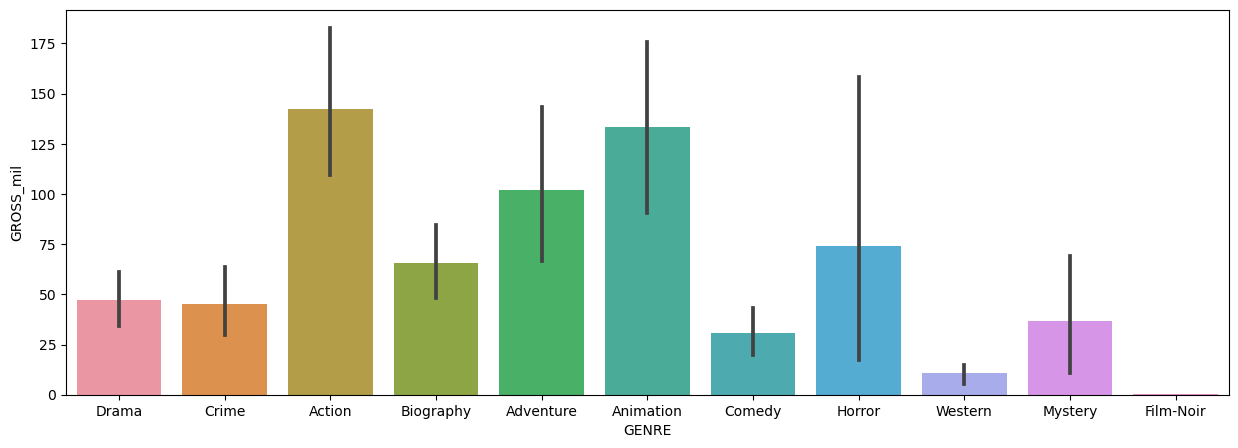

In [5]:
plt.figure(figsize=(15,5))
sns.barplot(data=data,x="GENRE",y="GROSS_mil")
plt.show()

In this plot we can see that average highest gross is made by "Action" movies ie above 125 million
Very less gross is made by "western" genre,"drama and crime" genre is at almost equal gross ie nearer to 50 million
"Boigraphy and horror" and "comedy and mystery"genre made the average gross nearer to 75 and 30 million respectively,
2nd highest gross of 125 million is made by genre "Animation" 3rd highest gross is made by genre "Adventure"

Overall we can conclude that highest income is made by Action movies
film  industry needs to make some changes regarding genre to increase the income(milloin),industry must need to focus on the impvrovement  in the quality of their product or outcome

<Figure size 1500x1500 with 0 Axes>

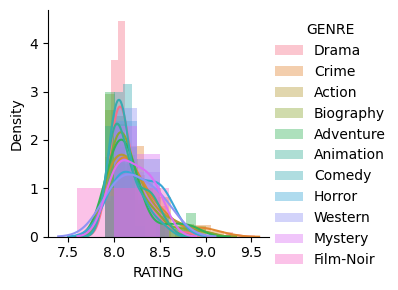

In [6]:
plt.figure(figsize=(15,15))
m=sns.FacetGrid(data=data,hue="GENRE")
m.map(sns.distplot,"RATING").add_legend()

Highest rating is given between 8 to 8.5,
genre "drama" has very high density,means very high amount of drama movies has given the rating of 8.2
Here u can see very less movies have rating of 9 to 9.5

data is unequally distributed considering genre,data is positvely skewed in some of the cases of genre regarding rating



<Figure size 3000x500 with 0 Axes>

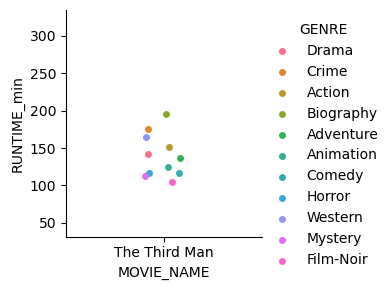

In [7]:
plt.figure(figsize=(30,5))
m=sns.FacetGrid(data=data,hue="GENRE")
m.map(sns.stripplot,"MOVIE_NAME","RUNTIME_min").add_legend()

Biography genre has runtime around 200 mins,drama and comedy genre overlapping meaning that they are having almost equal
runtime of 150 mins ,drama and comedy movie is having runtime above 150 min less than 200 min 

<Figure size 500x2000 with 0 Axes>

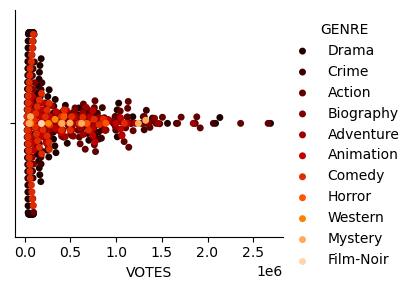

In [8]:
plt.figure(figsize=(5,20))
m=sns.FacetGrid(data=data,hue="GENRE",palette="gist_heat")
m.map(sns.swarmplot,"VOTES").add_legend()


among all released movies highest voting is given to 1 action movie  and  1 drama movie
western and mystery genre movies are released in countable amount
hardly film-Noir movies released 

In [9]:
g=data.groupby("GENRE")
A=g.get_group("Adventure")
A.head()

,MOVIE_NAME,YEAR,RUNTIME_min,RATING,METASCORE,VOTES,GROSS_mil,GENRE
8,777 Charlie,2022-01-01,136,8.9,33.0,32678,13.135,Adventure
13,"Il buono, il brutto, il cattivo",1966-01-01,161,8.8,90.0,765097,6.100,Adventure
21,Soorarai Pottru,2020-01-01,153,8.7,33.0,117688,13.135,Adventure
22,Interstellar,2014-01-01,169,8.6,74.0,1843769,188.020,Adventure
44,Back to the Future,1985-01-01,116,8.5,87.0,1211670,210.610,Adventure


<AxesSubplot:xlabel='GENRE', ylabel='count'>

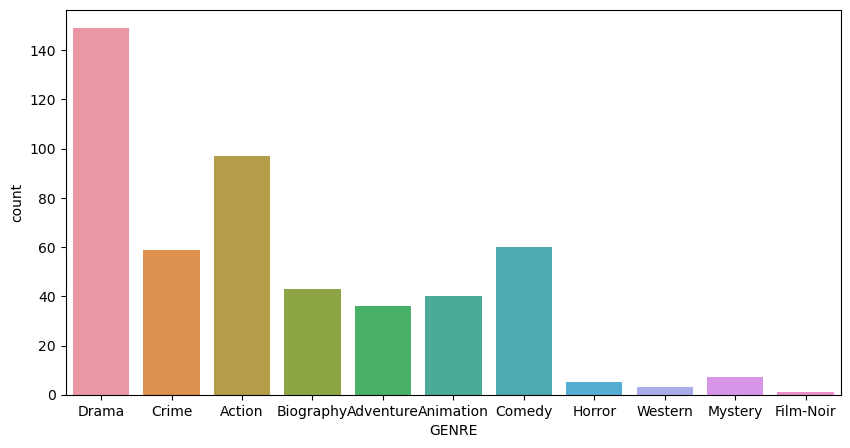

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(data["GENRE"])

very large amount of drama movies are released ,2nd release rate goes to action movies,crime and comedy are comes third ,
horror,western,mystery movies are released in negligible amount,
Biography, adventure and animation are released in countable amount

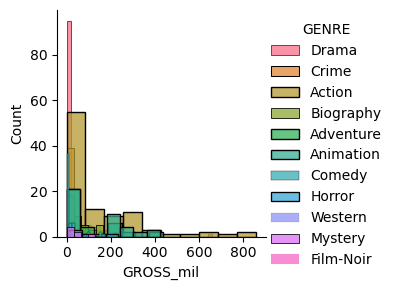

In [11]:
m=sns.FacetGrid(data=data,hue="GENRE")
m.map(sns.histplot,"GROSS_mil").add_legend()

gross is ranging from 1 to 800 million,some of the action movies crossed the 800 milloin ,
countable amount of movies are crossed 450 million  and above where as 
large amount of released movies made the income between 1 to 400 million ,
but we can see that action movies are participating in every distribution of gross,means action movies play very important role in creating income for the film industry,
adventure and animation movies are considerably taken into account when it comes to gross income 

<Figure size 3000x500 with 0 Axes>

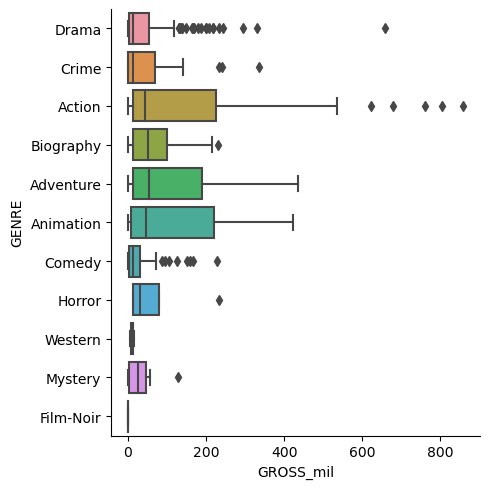

In [12]:
plt.figure(figsize=(30,5))
sns.factorplot(data=data,y="GENRE",x="GROSS_mil",kind="box")
plt.show()

In the above plot we can see that genre "drama" shows very large upper extreme values (outliers),which means that most of the 
drama movies made made gross more than maximun value,
Action movies made more gross income ,even some of them made highest gross crossing 800 ,in this genre we can see IQR is also high
Then comes animation and Adventure movies these movies donot have outliers
Comedy movies are  having some outliers
From Drama to horror genre we can se that data is right skewed or positive skewed meaning, mean is higher than median
western and mystery countable amount of movies are released making making gross less than 100
there is also no higher difference between min and max value,and  quartiles are hardly differnciable 

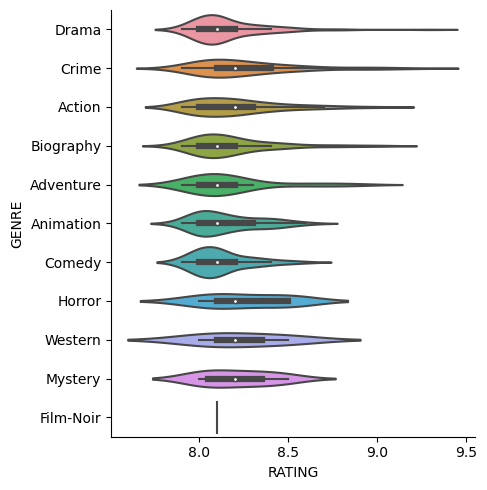

In [33]:
sns.factorplot(data=data,y="GENRE",x="RATING",kind="violin")

In the above plot we can see distribution plot of Genre drama having a normal bell curve which means that probability of rating of new
released drama film is near to mean value that is  around 8,data is equally distributed meaning mean=median,include most of the outliers
In crime and action movies mean is more which implies that rating data is positive skewed,indicating mean>median
mean of rating would be nearer to 8.5,including upper outliers
In animation movies data is positively skewed,including some outliers,In comedy movies data is right skewed
In the remaining Genre very less movies are released,making the rating data skewed to right,and donot include outliers


In [16]:
a=data["GROSS_mil"].mean()
a

75.59446999999987

In [13]:
data.corr()

,RUNTIME_min,RATING,METASCORE,VOTES,GROSS_mil
RUNTIME_min,1.000000,0.191961,-0.069256,0.096223,0.065712
RATING,0.191961,1.000000,0.076086,0.531899,0.126807
METASCORE,-0.069256,0.076086,1.000000,0.294614,0.166849
VOTES,0.096223,0.531899,0.294614,1.000000,0.555144
GROSS_mil,0.065712,0.126807,0.166849,0.555144,1.000000


<AxesSubplot:>

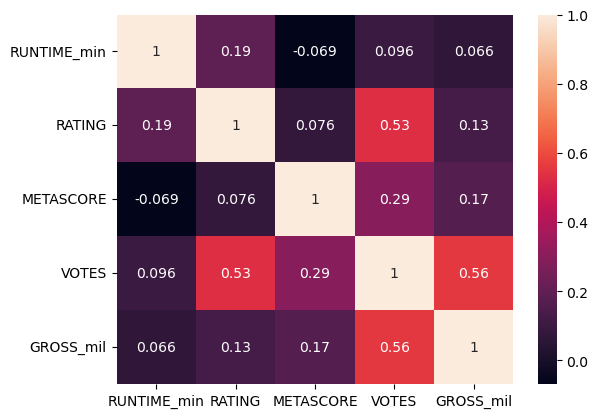

In [14]:
sns.heatmap(data.corr(),annot=True)

there is hardly any relation between variables regarding runtime ,
corr of votes to rating is 0.53 which implies that as voting increases rating will increase by 0.53 ,
corr of Gross to votes is 0.56 means as gross income increases voting also increase ,
remaining other variables have negative impact on each other indicating if one variable increases other decreases

<AxesSubplot:xlabel='GROSS_mil', ylabel='Density'>

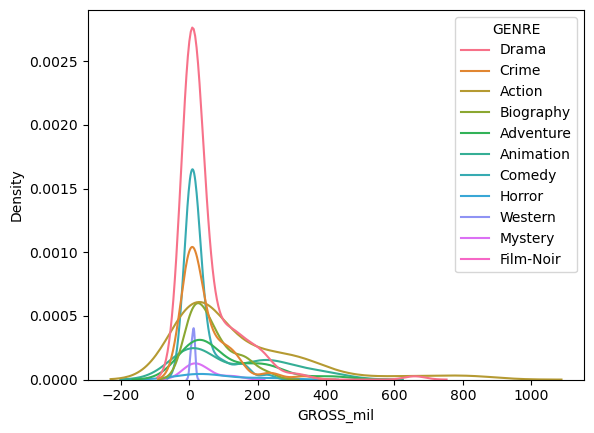

In [15]:
sns.kdeplot(data=data,x="GROSS_mil",hue="GENRE")

drama Genre has very high kde,means movies with drama Genre made the gross income near to 100,we can find some of the drama 
movie made gross income ranging from 200 to 800 ,
action movies  have curve which is having very large right skew ,inhere some of the movies crossed gross income of 1000 million ,
more Adventure movies are released but less than drama genre,here is also data is skewed making gross of 500 mil ,
densiy of crime movie is 0.0010,making gross more than mean as data is right skewed ,
 movies of remaining genre are at negligible density and gross

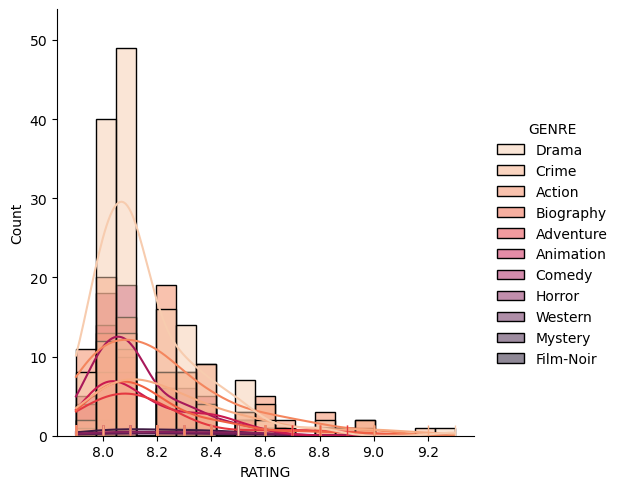

In [15]:
sns.displot(data=data,x="RATING",hue="GENRE",kde=True,rug=True,palette="rocket_r")

with this plot we can see large amount(50,40) of drama movies are released with rating (8.1,8.0) respectively ,
some action,biography and adventure movies are also having the rating ranging from 8 to 8.8 ,
but most of the action movies have rating above 9
here we can say that large amount of darma movies are release but highest rating is given to action movies ,
with the rug plot we can see position of each and every point  

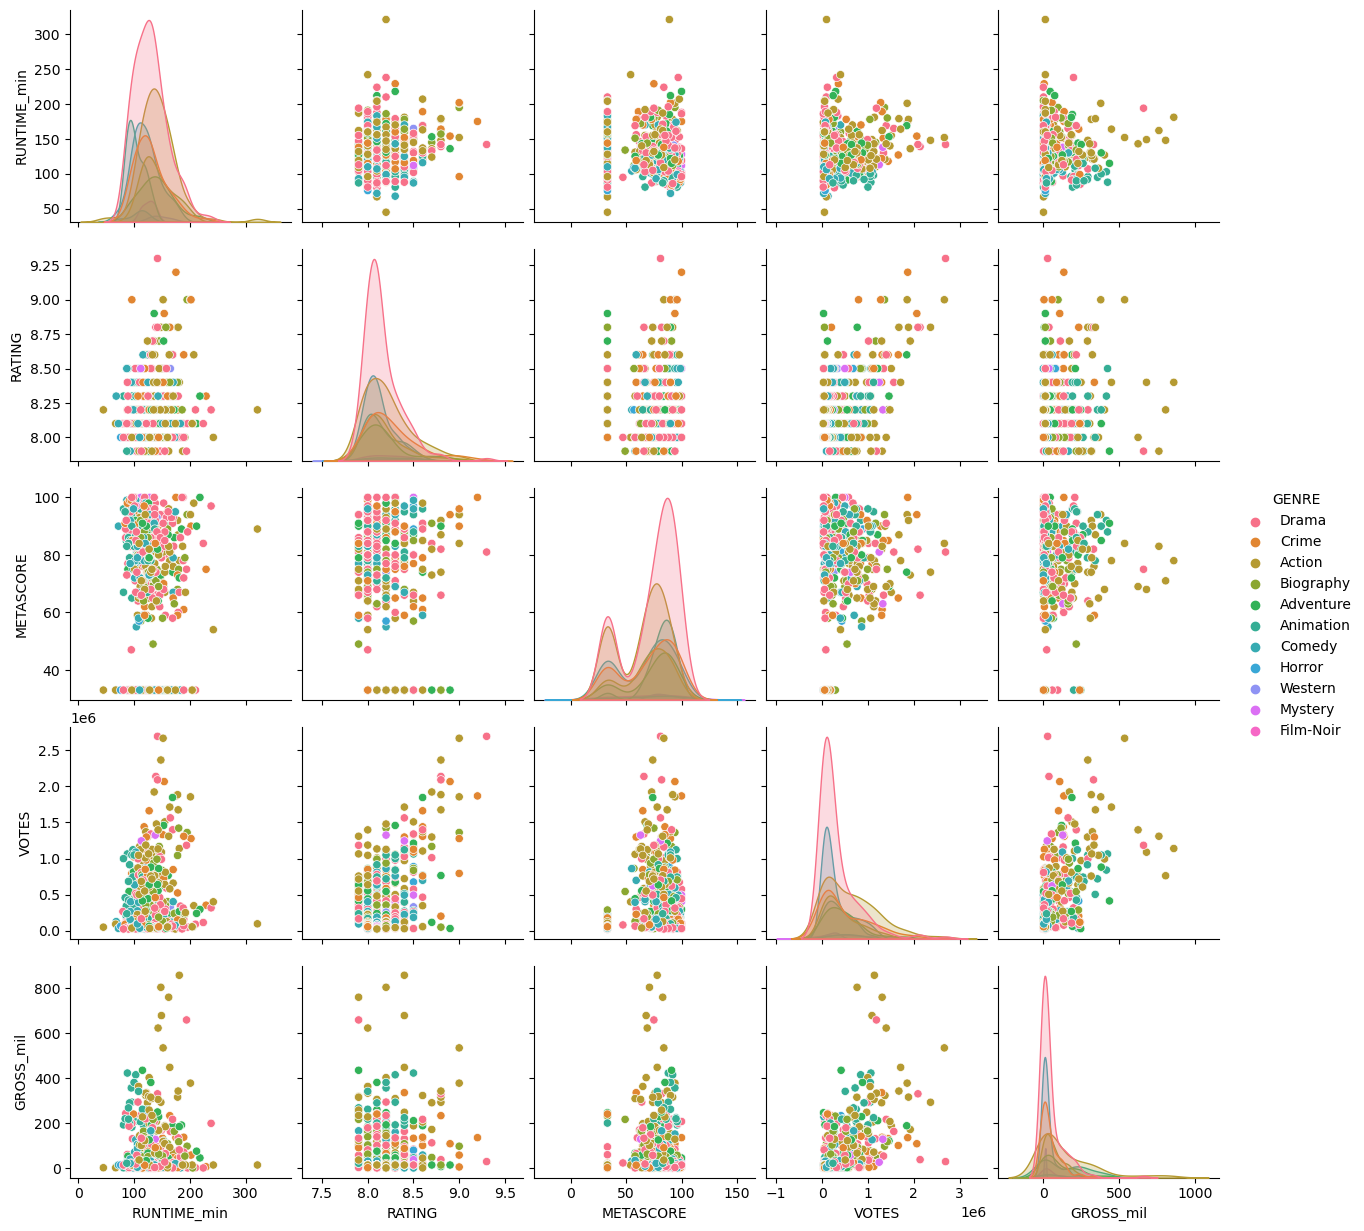

In [18]:
sns.pairplot(data=data,hue="GENRE")

from the pair plot we are not able to differnciate between variables as all the points in each pair are overlapping each other 